In [16]:
import os
import pandas as pd
import numpy as np
import cv2 as cv
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# from cf_matrix import make_confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
tf.keras.models.Sequential()
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import *

In [2]:
folder_list = os.listdir("train")
print(folder_list)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


(48, 48, 3)


(-0.5, 47.5, 47.5, -0.5)

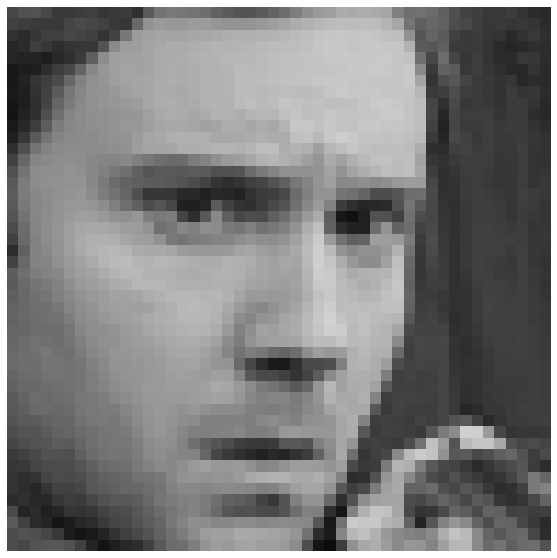

In [3]:
imagePath = "train/angry/im0.png"

img = cv.imread(imagePath)
print(img.shape)

# img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')

In [4]:
def dataset_setup(folder):
    X = []
    y = []


    folder_list = os.listdir(folder)

    for curr_folder in folder_list:
        for image_name in os.listdir(os.path.join(folder,curr_folder)):
            label = curr_folder

            image = cv.imread(os.path.join(f"./{folder}/{curr_folder}", image_name))
            grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

            # normalized = grayscale / 255
            # resized = cv.resize(normalized, (60, 40), interpolation=cv.INTER_AREA)
            # resized = cv.resize(normalized, (40, 40), interpolation=cv.INTER_AREA)

            # Unrolling the matrices into vectors of 2400 pixels.
            X.append(grayscale)
            y.append(label)

    X = np.array(X)
    y = np.array(y)

    # plt.imshow(np.reshape(X[0], (40,60)), cmap="gray")
    plt.imshow(X[3995], cmap="gray")
    plt.title(f"Example of Processed Image (48x48) label:{y[3995]}")

    print("Input Array Shape:",X.shape)
    print("Label Array Shape:",y.shape)

    return X, y

Input Array Shape: (28709, 48, 48)
Label Array Shape: (28709,)
Input Array Shape: (7178, 48, 48)
Label Array Shape: (7178,)


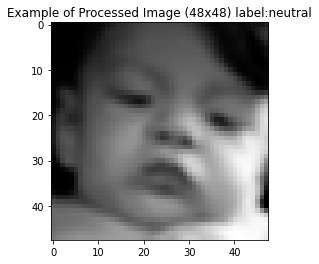

In [5]:
X, y = dataset_setup("train")
X_test, y_test = dataset_setup("test")

In [6]:
encoder = OneHotEncoder(categories=[folder_list])
y_encoded = np.array(encoder.fit_transform(y.reshape(-1,1)).toarray())

print(y_encoded[3994:3998, :])
print(y_encoded.shape)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]
(28709, 7)


In [7]:
encoder = OneHotEncoder(categories=[folder_list])
y_test_encoded = np.array(encoder.fit_transform(y_test.reshape(-1,1)).toarray())

print(y_test_encoded[3994:3998, :])
print(y_test_encoded.shape)

[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]
(7178, 7)


In [18]:
#CNN MODEL (Uncomment to use it)

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (48,48,1)),
    Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    BatchNormalization(),

    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    BatchNormalization(),
    
    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    BatchNormalization(),

    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)       

In [28]:
# MLP MODEL (uncomment to use it)

# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
# model.add(tf.keras.layers.Dense(units=1024))
# model.add(tf.keras.layers.Dense(units=512))
# model.add(tf.keras.layers.Dense(units=256, activation="relu"))

# model.add(tf.keras.layers.Dense(units=7, activation="softmax"))

# model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_22 (Dense)            (None, 1024)              2360320   
                                                                 
 dense_23 (Dense)            (None, 512)               524800    
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 3,018,247
Trainable params: 3,018,247
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode="min")

history = model.fit(X, y_encoded, batch_size=512, epochs=20, validation_data=(X_test, y_test_encoded))

Epoch 1/20
57/57 [==============================] - 2s 37ms/step - loss: 1896.6949 - accuracy: 0.1742 - val_loss: 701.2605 - val_accuracy: 0.1470
Epoch 2/20
57/57 [==============================] - 2s 36ms/step - loss: 574.0048 - accuracy: 0.1822 - val_loss: 227.0000 - val_accuracy: 0.2091
Epoch 3/20
57/57 [==============================] - 2s 36ms/step - loss: 137.5889 - accuracy: 0.1797 - val_loss: 2.1827 - val_accuracy: 0.1358
Epoch 4/20
57/57 [==============================] - 2s 36ms/step - loss: 1.9746 - accuracy: 0.1984 - val_loss: 1.9497 - val_accuracy: 0.2471
Epoch 5/20
57/57 [==============================] - 2s 36ms/step - loss: 1.9361 - accuracy: 0.2516 - val_loss: 1.9396 - val_accuracy: 0.2473
Epoch 6/20
57/57 [==============================] - 2s 39ms/step - loss: 1.9253 - accuracy: 0.2516 - val_loss: 1.9316 - val_accuracy: 0.2471
Epoch 7/20
57/57 [==============================] - 2s 37ms/step - loss: 1.9163 - accuracy: 0.2518 - val_loss: 1.9239 - val_accuracy: 0.2471
Ep

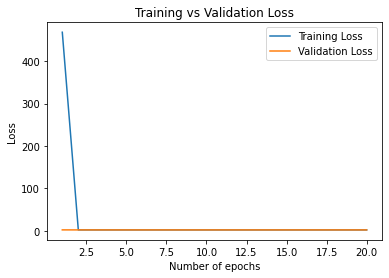

In [24]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epoch_axis = [i+1 for i in range(len(loss))]

plt.plot(epoch_axis, loss, label="Training Loss")
plt.plot(epoch_axis, val_loss, label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
if "saved_model" not in os.listdir("./"):
    os.mkdir(os.path.join("./", "saved_model"))
    model.save("saved_model")
    
else:
    if "test_models" not in os.listdir("./"):
        os.mkdir(os.path.join("./", "test_models"))
        
    test_models_directory = os.path.join("./", "test_models")

    model_name = input("Enter the model name:")
    model.save(os.path.join(test_models_directory, model_name))

INFO:tensorflow:Assets written to: ./test_models\model_test_v1\assets
